<img src="https://miro.medium.com/max/647/1*ZOcUPrSXLYucFxppoI-dYg.png">

# Problem definition


For this project we are using a car dataset, where we want to predict the selling price of car based on its certain features.
Since we need to find the real value, with real calculation, therefore this problem is regression problem. 
We will be using linear regression to solve this problem.

General equation of Multiple Linear Regression:
$$y = \beta_0 + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3 + \beta_{4}x_4 + ... + \beta_{n}x_n$$

# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

# Data Gathering

In [6]:
df=pd.read_csv("final_scout_dummy.csv") 

# Data Preparation

In [7]:
df.head()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,...,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A1,make_model_Audi A2,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Price negotiable,vat_VAT deductible,Type_Demonstration,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear
0,15770,56013.0,7.0,3.0,2.0,66.0,1,1422.0,1220.0,3.8,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,...,0,0,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0
1,14500,80000.0,7.0,2.0,1.0,141.0,0,1798.0,1255.0,5.6,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,...,0,0,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0
2,14640,83450.0,7.0,3.0,1.0,85.0,0,1598.0,1135.0,3.8,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0
3,14500,73000.0,6.0,3.0,1.0,66.0,0,1422.0,1195.0,3.8,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,...,0,0,0,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0
4,16790,16200.0,7.0,3.0,1.0,66.0,1,1422.0,1135.0,4.1,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,1,...,0,0,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0


# Feature Engineering

<ul>Fuel_Type feature:
    <li>Fuel is Petrol if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 1</li>
    <li>Fuel is Diesel if Fuel_type_diesel = 1 ,Fuel_Type_Petrol = 0</li>
    <li>Fuel is cng if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 0</li>
   </ul>
<ul>Transmission feature:
    <li>transmission is manual if Transmission_Manual = 1</li> 
    <li>transmission is automatic if Transmission_Manual = 0</li></ul>
<ul>Seller_Type feature:
    <li>Seller_Type is Individual if Seller_Type_Individual = 1 </li> 
    <li>Seller_Type is dealer if Seller_Type_Individual = 0</li> </ul>
    


### Features and target variable

In [9]:
X = df.drop("price", axis =1)
y = df["price"]

### Splitting data into training and testing

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

##Scaling the Data


scaling : Fitting our data to the same ranges.
Whether a feature is important or not in ML is expressed with coefficients. The ranges of my features can have different range values for each. If we don't do a scale, features in a large range are weighted more (valid for distance-based models) and our model will return incorrect results. We use scale to prevent this. It also accelerates the work of Gradient descent-based models such as linear, logistic regression.

There is no disadvantage of applying scale to data. data scale If you are confused about whether to apply it or not, you can apply scale directly.

Data leakage: Leakage of information about the data in the test set to the data in the train set
To prevent leakage, only fit operation is applied to X_train. On the other hand, only transform operation is applied to X_test. no fit operation is applied to all data.

Target is never scaled.

##with standard scaler

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler =  StandardScaler()

In [13]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[ 1.33838567, -1.32568735,  1.4367795 , ..., -0.1148382 ,
         0.11643258, -0.01895245],
       [-0.86471793, -1.32568735, -1.24110633, ..., -0.1148382 ,
         0.11643258, -0.01895245],
       [-0.36974418,  2.92373442, -0.34847772, ..., -0.1148382 ,
         0.11643258, -0.01895245],
       ...,
       [-0.40543161, -1.32568735,  0.54415089, ..., -0.1148382 ,
         0.11643258, -0.01895245],
       [-0.69201243, -1.32568735, -0.34847772, ..., -0.1148382 ,
         0.11643258, -0.01895245],
       [-0.1600265 ,  0.09078657, -0.34847772, ..., -0.1148382 ,
         0.11643258, -0.01895245]])

In [14]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.82050439, -1.32568735, -1.24110633, ..., -0.1148382 ,
         0.11643258, -0.01895245],
       [-0.864772  , -1.32568735, -1.24110633, ..., -0.1148382 ,
         0.11643258, -0.01895245],
       [ 3.70402926,  0.09078657,  1.4367795 , ..., -0.1148382 ,
         0.11643258, -0.01895245],
       ...,
       [-0.82050439,  0.09078657, -1.24110633, ..., -0.1148382 ,
         0.11643258, -0.01895245],
       [-0.28709535,  0.09078657, -0.34847772, ..., -0.1148382 ,
         0.11643258, -0.01895245],
       [-0.56764717, -1.32568735, -0.34847772, ..., -0.1148382 ,
         0.11643258, -0.01895245]])

checking std = 1 and mean = 0
this gives us the z-scores. so it's also called z-score

These values show where in the normal distribution they correspond to the z score.

In [15]:
pd.DataFrame(X_train_scaled).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141
mean,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
pd.DataFrame(X_test_scaled).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176
mean,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,...,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0


##with robustscaler

In [25]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = RobustScaler()

In [86]:
X_train_rscaled = scaler.fit_transform(X_train)
X_train_rscaled

array([[-0.28617504,  1.13477991,  0.52656809, ..., -0.02680402,
        -0.02507174, -0.01641036],
       [-0.42894859, -0.83804162, -1.02857323, ..., -0.02680402,
        -0.02507174, -0.01641036],
       [ 0.26881669,  0.79977248,  0.52656809, ..., -0.02680402,
        -0.02507174, -0.01641036],
       ...,
       [-0.40523006, -0.68914943,  0.52656809, ..., -0.02680402,
        -0.02507174, -0.01641036],
       [-0.69355158, -1.06137991,  0.52656809, ..., -0.02680402,
        -0.02507174, -0.01641036],
       [-0.40302685, -0.05635762, -1.02857323, ..., -0.02680402,
        -0.02507174, -0.01641036]])

In [87]:
X_test_rscaled = scaler.transform(X_test)
X_test_rscaled

array([[-0.69191957, -0.68914943,  0.52656809, ..., -0.02680402,
        -0.02507174, -0.01641036],
       [-0.25562928, -0.05635762,  0.52656809, ..., -0.02680402,
        -0.02507174, -0.01641036],
       [ 1.46042777,  0.427542  ,  0.52656809, ..., -0.02680402,
        -0.02507174, -0.01641036],
       ...,
       [-0.38564596, -0.13080371,  0.52656809, ..., -0.02680402,
        -0.02507174, -0.01641036],
       [-0.8675509 , -1.39638734,  0.52656809, ..., -0.02680402,
        -0.02507174, -0.01641036],
       [-0.22434911, -0.05635762,  0.52656809, ..., -0.02680402,
        -0.02507174, -0.01641036]])

##  Model Building (Linear Regression)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lr=LinearRegression()

# Interpret the model

In [18]:
lr.fit(X_train, y_train)

LinearRegression()

In [19]:
predictions = lr.predict(X_test)

Text(0, 0.5, 'PRedictions Y')

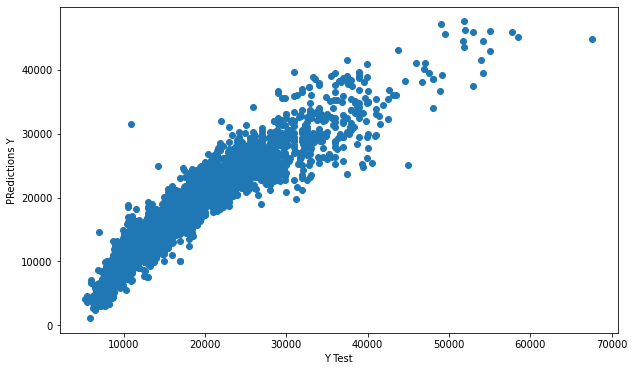

In [20]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('PRedictions Y')

In [21]:
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [22]:
print("Lrcoeff: ",lr.coef_)

Lrcoeff:  [-1.33369137e+03  4.49558722e+02 -1.79503795e+03  4.03905046e+01
  2.48999498e+03 -7.80925171e+01 -2.71546174e+02 -2.37919611e+02
  1.52734450e+02  7.62056510e+01 -2.84116416e+01  1.12503465e+01
  1.32590275e+02 -2.01049849e+01  1.27133013e+02  3.84651752e+14
 -3.66685207e+01  3.31201185e+01  8.81986195e+01  1.05089770e+02
  4.52784212e+02  1.98558262e+02  6.23343826e+01  5.36178014e+00
 -3.39320233e+01  4.67751342e+01  4.42407252e+01 -1.32798363e+02
  4.87957824e+01  4.49560611e+01  1.68144566e+02 -6.90665408e+01
  2.58923527e+02  4.46015625e+01  2.34656250e+02  1.15138672e+02
 -2.08289062e+02  8.07910156e+00 -1.09931641e+02 -1.57598877e+01
  1.84529297e+02 -7.98750000e+01 -2.39726562e+01  1.09542969e+02
  8.08593750e-01 -4.19492188e+01  1.78632812e+01 -2.29015625e+02
  3.18359375e+01  2.80621094e+02  3.18320312e+01  2.98906250e+01
 -2.42236328e+00  7.21425781e+01 -7.89921875e+01 -9.04687500e+00
 -1.54113281e+02  5.79062500e+01  2.00468750e+01  5.41425781e+01
 -6.67968750e+0

##Predicting Test Data

In [23]:
y_pred = lr.predict(X_test_scaled)
y_train_pred = lr.predict(X_train_scaled)

In [27]:
from sklearn.metrics import mean_squared_error
print("Liner Regression MSE: ",mean_squared_error(y_test,y_pred))

Liner Regression MSE:  3.0985752992741004e+25


##Model Evaluation

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, i):
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [29]:
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear")
ls

,linear_train,linear_test
R2,8.918696e-01,-5.824707e+17
mae,1.690184e+03,8.055534e+10
mse,5.951119e+06,3.098575e+25
rmse,2.439492e+03,5.566485e+12


In [ ]:
print('Coefficients: \n', lr.coef_)

Coefficients: 
 [ 6.40489738e+03 -1.27215782e+03  2.27866135e+03  2.65988744e+02
 -3.06420698e+01 -1.19604573e+02  1.06126053e+02 -2.65769057e+02
 -1.30819571e+03  1.07159110e+01  5.02761297e+01 -2.17779019e+01
 -4.87670006e+01  1.27816984e+02 -7.07883488e+01  1.03031043e+02
  5.44625392e+14 -9.64314152e+00  1.11066056e+02  6.46543839e+01
  1.03403552e+02  5.43291331e+02  1.16782145e+02  9.15934841e+01
  4.71019217e+01 -3.62419469e+01  1.15966603e+02  3.07989255e+01
 -1.18440675e+02  4.94817259e+01 -1.65212945e+01  7.99236614e+01
 -4.44470992e+01  1.72724609e+02  3.00703125e+01  2.09625000e+02
  6.30000000e+01 -6.12363281e+01  7.06093750e+01 -1.38265625e+02
  5.34882812e+01  1.85750000e+02 -1.20437500e+02 -5.03007812e+01
  9.27343750e+01 -5.15507812e+01 -1.43491211e+01  4.50781250e+00
 -2.63265625e+02  6.57636719e+01  2.95832031e+02  3.04218750e+01
 -7.13203125e+01  2.42109375e+01  1.05960938e+02 -5.72109375e+01
 -4.98750000e+01 -1.14171875e+02  1.95468750e+01 -2.61987305e+01
  3.81933

## Residuals
Plotting a histogram of the residuals and  to make sure it looks normally distributed

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


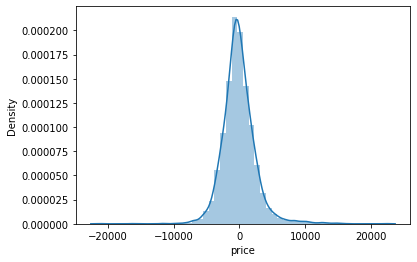

In [95]:
sns.distplot((y_test-predictions),bins=50);

## Let's see if we can interpret the coefficients at all to get an idea

In [ ]:
coefficients = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
coefficients

,Coefficient
Unnamed: 0,6.404897e+03
km,-1.272158e+03
hp,2.278661e+03
Nr. of Doors,2.659887e+02
Nr. of Seats,-3.064207e+01
...,...
Upholstery_Color_Orange,3.807106e+12
Upholstery_Color_Other,9.738573e+13
Upholstery_Color_Red,1.076474e+13
Upholstery_Color_White,1.006994e+13


##Cross Validate
We do cross-validation to check whether the one-time scores we receive are consistent or not

cross validation is only applied to the train set.

In [17]:
from sklearn.model_selection import cross_validate, cross_val_score

In [ ]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 5)

In [ ]:
pd.DataFrame(scores, index = range(1,6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.112659,0.002829,8.808776e-01,-1.730759e+03,-6.583445e+06,-2.565822e+03
2,0.145644,0.007921,-6.595616e+22,-7.138401e+13,-3.786155e+30,-1.945804e+15
3,0.157012,0.002819,-4.067444e+23,-1.730324e+14,-2.224558e+31,-4.716522e+15
4,0.140909,0.002769,-3.758573e+24,-5.253575e+14,-2.137774e+32,-1.462113e+16
5,0.155560,0.002760,-2.070784e+24,-3.989225e+14,-1.084268e+32,-1.041282e+16


In [ ]:
scores = pd.DataFrame(scores, index=range(1,6))
scores.iloc[:, 2:].mean()

test_r2                            -1.260411e+24
test_neg_mean_absolute_error       -2.337393e+14
test_neg_mean_squared_error        -6.964719e+31
test_neg_root_mean_squared_error   -6.339255e+15
dtype: float64

In [ ]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear")

,linear_train,linear_test
R2,8.922155e-01,-1.178043e+18
mae,1.672260e+03,1.140338e+11
mse,5.963444e+06,6.210570e+25
rmse,2.442016e+03,7.880717e+12


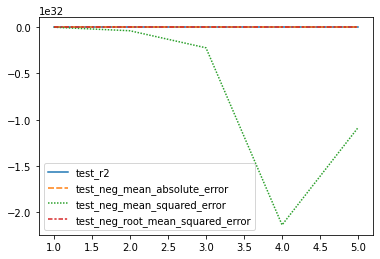

In [ ]:
sns.lineplot(data = scores.iloc[:,2:]);

# Regularization

# Ridge

###Ridge and lasso and elastic-net regression are a model tuning method that is used to analyse any data that suffers from multicollinearity, underfiting and overfiting

In [43]:
from sklearn.linear_model import Ridge

In [57]:
ridge = Ridge( random_state=42, max_iter= 200000,)
#ridge_model = Ridge(alpha=1, random_state=42)

In [96]:
from sklearn.model_selection import GridSearchCV

In [97]:
alphas= np.logspace(-4,-0.5,30)

In [101]:
alphas

array([1.00000000e-04, 1.32035178e-04, 1.74332882e-04, 2.30180731e-04,
       3.03919538e-04, 4.01280703e-04, 5.29831691e-04, 6.99564216e-04,
       9.23670857e-04, 1.21957046e-03, 1.61026203e-03, 2.12611233e-03,
       2.80721620e-03, 3.70651291e-03, 4.89390092e-03, 6.46167079e-03,
       8.53167852e-03, 1.12648169e-02, 1.48735211e-02, 1.96382800e-02,
       2.59294380e-02, 3.42359796e-02, 4.52035366e-02, 5.96845700e-02,
       7.88046282e-02, 1.04049831e-01, 1.37382380e-01, 1.81393069e-01,
       2.39502662e-01, 3.16227766e-01])

In [105]:
tuned_parameters= {'alpha':alphas}
n_folds=5

In [106]:
clf=GridSearchCV(estimator=ridge, param_grid=tuned_parameters, cv=n_folds, scoring="neg_mean_squared_error", refit=True)


In [107]:
clf.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(max_iter=200000, random_state=42),
             param_grid={'alpha': array([1.00000000e-04, 1.32035178e-04, 1.74332882e-04, 2.30180731e-04,
       3.03919538e-04, 4.01280703e-04, 5.29831691e-04, 6.99564216e-04,
       9.23670857e-04, 1.21957046e-03, 1.61026203e-03, 2.12611233e-03,
       2.80721620e-03, 3.70651291e-03, 4.89390092e-03, 6.46167079e-03,
       8.53167852e-03, 1.12648169e-02, 1.48735211e-02, 1.96382800e-02,
       2.59294380e-02, 3.42359796e-02, 4.52035366e-02, 5.96845700e-02,
       7.88046282e-02, 1.04049831e-01, 1.37382380e-01, 1.81393069e-01,
       2.39502662e-01, 3.16227766e-01])},
             scoring='neg_mean_squared_error')

In [108]:
scores=clf.cv_results_["mean_test_score"]
scores_std=clf.cv_results_["std_test_score"]

In [111]:
print("Ridge Coeff: ", clf.best_estimator_)

Ridge Coeff:  Ridge(alpha=0.31622776601683794, max_iter=200000, random_state=42)


In [112]:
ridge=clf.best_estimator_
print("Ridge best Estimator: ", ridge)

Ridge best Estimator:  Ridge(alpha=0.31622776601683794, max_iter=200000, random_state=42)


In [113]:
y_pred=clf.predict(X_test_scaled)
mse=mean_squared_error(y_test, y_pred)

In [ ]:
#y_pred = ridge_model.predict(X_test_scaled)
#y_train_pred = ridge_model.predict(X_train_scaled)

In [117]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,0.888,0.877
mae,1727.292,1795.392
mse,6187216.769,6490603.769
rmse,2487.412,2547.666


In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
pd.concat([ls, rs], axis=1)

For Ridge Regression CV with alpha : 1

In [ ]:
model = Ridge(alpha=1, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [ ]:
pd.DataFrame(scores, index = range(1, 6))

In [116]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

ValueError: ignored

In [ ]:
train_val(y_train, y_train_pred, y_test, y_pred, "ridge")

In [ ]:
sns.lineplot(data = scores.iloc[:,2:])

In [ ]:
ridge_model.coef_

In [ ]:
rm_df = pd.DataFrame(ridge_model.coef_, columns = ["ridge_coef_1"])

In [115]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
pd.concat([lm_df,rm_df], axis = 1)

Choosing best alpha value with Cross-Validation

In [ ]:
from sklearn.linear_model import RidgeCV

In [ ]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

In [ ]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 5, scoring= "neg_root_mean_squared_error")

In [ ]:
ridge_cv_model.fit(X_train_scaled, y_train)

In [ ]:
ridge_cv_model.alpha_

In [ ]:
ridge_cv_model.best_score_

In [ ]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [ ]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv")
rcs

In [ ]:
pd.concat([ls, rs, rcs], axis = 1)

In [ ]:
ridge_cv_model.coef_

In [ ]:
rcm_df = pd.DataFrame(ridge_cv_model.coef_, columns=["ridge_cv_coef_0.02"])

In [ ]:
pd.concat([lm_df,rm_df, rcm_df], axis = 1)

# Lasso

In [119]:
from sklearn.linear_model import Lasso, LassoCV

In [120]:
lasso_model = Lasso(alpha=1, random_state=42)
lasso_model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.721e+08, tolerance: 6.165e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso(alpha=1, random_state=42)

In [121]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [122]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,0.888,0.877
mae,1726.496,1794.332
mse,6187476.716,6488328.433
rmse,2487.464,2547.220


In [123]:
pd.concat([ls, rs, rcs, lss], axis = 1)

NameError: ignored

For Lasso CV with Default Alpha : 1

In [ ]:
model = Lasso(alpha=1, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [ ]:
pd.DataFrame(scores, index = range(1, 6))

In [ ]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

In [ ]:
train_val(y_train, y_train_pred, y_test, y_pred, "lasso")

In [ ]:
sns.lineplot(data = scores.iloc[:,2:])

In [ ]:
lasso_model.coef_

In [ ]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_1"])

In [ ]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df], axis = 1)

Choosing best alpha value with Cross-Validation

In [ ]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5, max_iter=100000, random_state=42)

In [ ]:
lasso_cv_model.fit(X_train_scaled, y_train)

In [ ]:
lasso_cv_model.alpha_

In [ ]:
np.where(alpha_space[::-1]==lasso_cv_model.alpha_)

In [ ]:
alpha_space[::-1]

In [ ]:
#mse score for CV
lasso_cv_model.mse_path_[-1].mean()

In [ ]:
y_pred = lasso_cv_model.predict(X_test_scaled)   #Lasso(alpha =0.01)
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [ ]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs

In [ ]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1)

In [ ]:
lasso_cv_model.coef_

In [ ]:
lcm_df = pd.DataFrame(lasso_cv_model.coef_, columns = ["lasso_cv_coef_0.01"])

In [ ]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df], axis = 1)

## Elastic-Net 

In [ ]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [ ]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)
elastic_model.fit(X_train_scaled, y_train)

In [ ]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [ ]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

In [ ]:
pd.concat([ls,rs, rcs, lss, lcs, es], axis = 1)

For Elastic_net CV with Default alpha = 1 and l1_ratio=0.5

In [ ]:
model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [ ]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:]

In [ ]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

In [ ]:
train_val(y_train, y_train_pred, y_test, y_pred, "elastic")

In [ ]:
elastic_model.coef_

In [ ]:
em_df = pd.DataFrame(elastic_model.coef_, columns=["elastic_coef_(alp:1, l1:0.5)"])

In [ ]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df], axis = 1)

Choosing best alpha and l1_ratio values with Cross-Validation

In [ ]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1], cv = 5, 
                                max_iter = 100000,random_state=42)

In [ ]:
elastic_cv_model.fit(X_train_scaled, y_train)

In [ ]:
elastic_cv_model.alpha_

In [ ]:
elastic_cv_model.l1_ratio_

In [ ]:
#mse score for CV
elastic_cv_model.mse_path_[5][-1].mean()

In [ ]:
y_pred = elastic_cv_model.predict(X_test_scaled)
y_train_pred = elastic_cv_model.predict(X_train_scaled)

In [ ]:
ecs = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_cv")
ecs

In [ ]:
pd.concat([ls,rs, rcs, lss, lcs, es, ecs], axis = 1)

In [ ]:
elastic_cv_model.coef_

In [ ]:
ecm_df = pd.DataFrame(elastic_cv_model.coef_, columns=["elastic_coef_(alp:0.01, l1:1)"])

In [ ]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df, ecm_df], axis = 1)

##Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
elastic_model = ElasticNet(max_iter=10000, random_state=42)

In [ ]:
param_grid = {"alpha":[0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [ ]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =5, verbose =2)

In [ ]:
grid_model.fit(X_train_scaled, y_train)

In [ ]:
grid_model.best_params_

In [ ]:
pd.DataFrame(grid_model.cv_results_)

In [ ]:
grid_model.best_index_

In [ ]:
grid_model.best_score_

##Using Best Hyper Parameters From GridSearch

In [ ]:
y_pred = grid_model.predict(X_test_scaled)
y_train_pred = grid_model.predict(X_train_scaled)

In [ ]:
train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")

##Final Model

In [118]:
final_scaler = StandardScaler()
X_scaled = final_scaler.fit_transform(poly_features)

NameError: ignored

In [ ]:
final_model = Lasso(alpha=0.01) #lasso_cv_model

In [ ]:
final_model.fit(X_scaled, y)

##Feature importances with Ridge

In [ ]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(ridge_cv_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()

##Feature importances with Lasso

In [ ]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(lasso_cv_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()